In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
train_df = pd.read_csv('TitanicSolution/titanic_train.csv')
test_df = pd.read_csv('TitanicSolution/titanic_test.csv')

In [3]:
#Анализ данных

In [4]:
train_df.head(10)

,passenger_id,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived
0,1216,3,"Smyth, Miss. Julia",female,NaN,0,0,335432,7.7333,NaN,Q,13,NaN,NaN,1
1,699,3,"Cacic, Mr. Luka",male,38.0,0,0,315089,8.6625,NaN,S,NaN,NaN,Croatia,0
2,1267,3,"Van Impe, Mrs. Jean Baptiste (Rosalie Paula Go...",female,30.0,1,1,345773,24.1500,NaN,S,NaN,NaN,NaN,0
3,449,2,"Hocking, Mrs. Elizabeth (Eliza Needs)",female,54.0,1,3,29105,23.0000,NaN,S,4,NaN,"Cornwall / Akron, OH",1
4,576,2,"Veal, Mr. James",male,40.0,0,0,28221,13.0000,NaN,S,NaN,NaN,"Barre, Co Washington, VT",0
5,1083,3,"Olsen, Mr. Henry Margido",male,28.0,0,0,C 4001,22.5250,NaN,S,NaN,173.0,NaN,0
6,898,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0000,NaN,S,NaN,NaN,NaN,0
7,560,2,"Sinkkonen, Miss. Anna",female,30.0,0,0,250648,13.0000,NaN,S,10,NaN,"Finland / Washington, DC",1
8,1079,3,"Ohman, Miss. Velin",female,22.0,0,0,347085,7.7750,NaN,S,C,NaN,NaN,1
9,908,3,"Jussila, Miss. Mari Aina",female,21.0,1,0,4137,9.8250,NaN,S,NaN,NaN,NaN,0


In [5]:

#passenger_id - индекс пассажира
#pclass       - класс билета (Первый, Второй, Третий классы)
#name         - ФИО пассажира
#sex          - пол пассажира
#age          - возраст пассажира
#sibsp        - число братьев/сестер/супругов пассажира на борту
#parch        - число родителей детей на борту
#ticket       - номер билета
#fare         - сумма, оплаченная пассажиром за путешествие
#cabin        - номер каюты пассажира
#embarked     - порт отправления пассажира
#boat         - 
#body         - рост пассажира в см
#home.dest    - конечное направление пассажира
#survived     - выжил ли пассажир


In [6]:
train_df.shape

(850, 15)

In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   passenger_id  850 non-null    int64  
 1   pclass        850 non-null    int64  
 2   name          850 non-null    object 
 3   sex           850 non-null    object 
 4   age           676 non-null    float64
 5   sibsp         850 non-null    int64  
 6   parch         850 non-null    int64  
 7   ticket        850 non-null    object 
 8   fare          849 non-null    float64
 9   cabin         191 non-null    object 
 10  embarked      849 non-null    object 
 11  boat          308 non-null    object 
 12  body          73 non-null     float64
 13  home.dest     464 non-null    object 
 14  survived      850 non-null    int64  
dtypes: float64(3), int64(5), object(7)
memory usage: 99.7+ KB


In [8]:
train_df.describe()

,passenger_id,pclass,age,sibsp,parch,fare,body,survived
count,850.000000,850.00000,676.000000,850.000000,850.000000,849.000000,73.000000,850.000000
mean,662.816471,2.32000,29.519847,0.522353,0.382353,34.012701,165.821918,0.368235
std,380.751936,0.83853,14.562243,1.112132,0.879511,53.705779,99.068487,0.482610
min,1.000000,1.00000,0.166700,0.000000,0.000000,0.000000,4.000000,0.000000
25%,332.250000,2.00000,20.000000,0.000000,0.000000,7.895800,75.000000,0.000000
50%,676.500000,3.00000,28.000000,0.000000,0.000000,14.108300,166.000000,0.000000
75%,992.250000,3.00000,37.000000,1.000000,0.000000,31.000000,260.000000,1.000000
max,1307.000000,3.00000,80.000000,8.000000,9.000000,512.329200,328.000000,1.000000


In [9]:
train_df.describe(include=['O'])

,name,sex,ticket,cabin,embarked,boat,home.dest
count,850,850,850,191,849,308,464
unique,849,2,660,135,3,26,272
top,"Kelly, Mr. James",male,CA. 2343,D,S,4,"New York, NY"
freq,2,551,10,4,589,25,36


In [10]:
test_df.head(10)

,passenger_id,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,295,1,"Thayer, Mr. John Borland Jr",male,17.0000,0,2,17421,110.8833,C70,C,B,NaN,"Haverford, PA"
1,1150,3,"Risien, Mr. Samuel Beard",male,NaN,0,0,364498,14.5000,NaN,S,NaN,NaN,NaN
2,89,1,"Davidson, Mr. Thornton",male,31.0000,1,0,F.C. 12750,52.0000,B71,S,NaN,NaN,"Montreal, PQ"
3,1063,3,"Nirva, Mr. Iisakki Antino Aijo",male,41.0000,0,0,SOTON/O2 3101272,7.1250,NaN,S,NaN,NaN,"Finland Sudbury, ON"
4,1020,3,"Minkoff, Mr. Lazar",male,21.0000,0,0,349211,7.8958,NaN,S,NaN,NaN,NaN
5,747,3,"Danbom, Master. Gilbert Sigvard Emanuel",male,0.3333,0,2,347080,14.4000,NaN,S,NaN,NaN,"Stanton, IA"
6,368,2,"Chapman, Mr. John Henry",male,37.0000,1,0,SC/AH 29037,26.0000,NaN,S,NaN,17.0,"Cornwall / Spokane, WA"
7,1047,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15.0000,0,0,2667,7.2250,NaN,C,C,NaN,NaN
8,569,2,"Sweet, Mr. George Frederick",male,14.0000,0,0,220845,65.0000,NaN,S,NaN,NaN,"Somerset / Bernardsville, NJ"
9,232,1,"Porter, Mr. Walter Chamberlain",male,47.0000,0,0,110465,52.0000,C110,S,NaN,207.0,"Worcester, MA"


In [11]:
test_df['boat'].unique()

array(['B', nan, 'C', '11', '5', '14', '13', '15', '6', '16', '9', '10',
       '7', 'D', '1', '3', '12', '8', '8 10', 'A', '4', '2', '5 7',
       '13 15'], dtype=object)

In [12]:
test_df.shape

(459, 14)

In [13]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 459 entries, 0 to 458
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   passenger_id  459 non-null    int64  
 1   pclass        459 non-null    int64  
 2   name          459 non-null    object 
 3   sex           459 non-null    object 
 4   age           370 non-null    float64
 5   sibsp         459 non-null    int64  
 6   parch         459 non-null    int64  
 7   ticket        459 non-null    object 
 8   fare          459 non-null    float64
 9   cabin         104 non-null    object 
 10  embarked      458 non-null    object 
 11  boat          178 non-null    object 
 12  body          48 non-null     float64
 13  home.dest     281 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 50.3+ KB


In [14]:
test_df.isnull().sum()

passenger_id      0
pclass            0
name              0
sex               0
age              89
sibsp             0
parch             0
ticket            0
fare              0
cabin           355
embarked          1
boat            281
body            411
home.dest       178
dtype: int64

In [15]:
#Анализ зависимостей между параметрами и выживаемостью

In [16]:
#Анализ влияния класса билета(pclass) на выживаемость
train_df.pclass.value_counts()

3    478
1    206
2    166
Name: pclass, dtype: int64

In [17]:
train_df.groupby('pclass').survived.value_counts()

pclass  survived
1       1           125
        0            81
2       0            90
        1            76
3       0           366
        1           112
Name: survived, dtype: int64

In [18]:
train_df[['pclass', 'survived']].groupby(['pclass'], as_index=False).mean()

,pclass,survived
0,1,0.606796
1,2,0.457831
2,3,0.234310


<AxesSubplot:xlabel='pclass', ylabel='survived'>

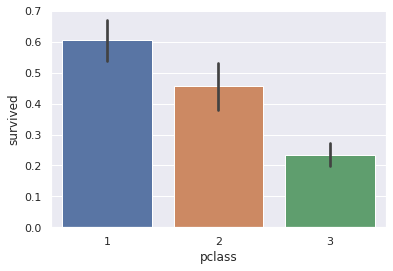

In [19]:
sns.barplot(x='pclass', y='survived', data=train_df)

In [20]:
#Анализа влияния пола пассажира на выживаемость
train_df.sex.value_counts()

male      551
female    299
Name: sex, dtype: int64

In [21]:
train_df.groupby('sex').survived.value_counts()

sex     survived
female  1           210
        0            89
male    0           448
        1           103
Name: survived, dtype: int64

In [22]:
train_df[['sex', 'survived']].groupby('sex', as_index=False).mean()

,sex,survived
0,female,0.702341
1,male,0.186933


<AxesSubplot:xlabel='sex', ylabel='survived'>

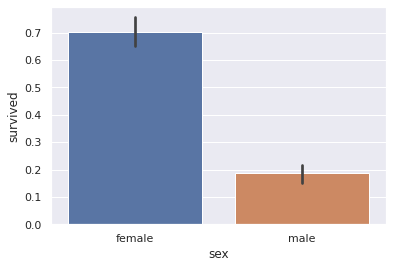

In [23]:
sns.barplot(x='sex', y='survived', data=train_df)

In [24]:
#Исходя из полученных данных, можем сделать вывод, что женщины имею наибольшие шансы на спасение

In [25]:
#Анализ влияния возраста пассажира на выживаемость
train_df.age.value_counts()

18.0    32
30.0    30
24.0    29
22.0    28
25.0    26
        ..
55.5     1
40.5     1
26.5     1
18.5     1
60.5     1
Name: age, Length: 88, dtype: int64

In [26]:
train_df.groupby('age').survived.value_counts()

age      survived
0.1667   1           1
0.4167   1           1
0.6667   1           1
0.7500   0           1
0.8333   1           3
                    ..
67.0000  0           1
70.0000  0           2
74.0000  0           1
76.0000  1           1
80.0000  1           1
Name: survived, Length: 144, dtype: int64

In [27]:
train_df[['age', 'survived']].groupby('age', as_index=False).mean()

,age,survived
0,0.1667,1.0
1,0.4167,1.0
2,0.6667,1.0
3,0.7500,0.0
4,0.8333,1.0
...,...,...
83,67.0000,0.0
84,70.0000,0.0
85,74.0000,0.0
86,76.0000,1.0


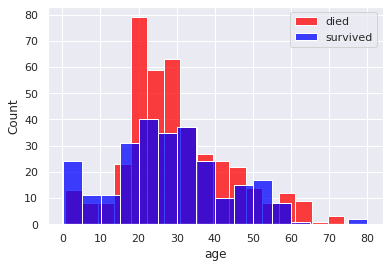

In [28]:
survived = train_df[train_df['survived'] == 1]
died = train_df[train_df['survived'] == 0]

sns.histplot(data=died, x='age', color='red', label='died', kde=False)
sns.histplot(data=survived, x='age', color='blue', label='survived', kde=False)
plt.legend()
plt.show()

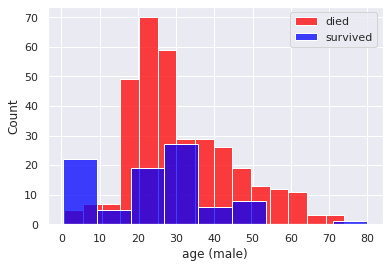

In [29]:
survived_male = train_df[(train_df['survived'] == 1) & (train_df['sex'] == 'male')]
died_male = train_df[(train_df['survived'] == 0) & (train_df['sex'] == 'male')]

sns.histplot(data=died_male, x='age', color='red', label='died', kde=False)
sns.histplot(data=survived_male, x='age', color='blue', label='survived', kde=False)
plt.legend()
plt.xlabel('age (male)')
plt.show()

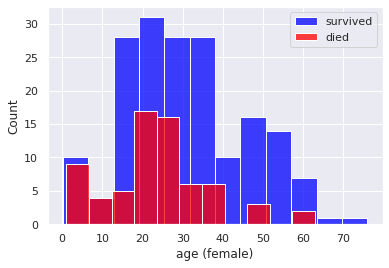

In [30]:
survived_fem = train_df[(train_df['survived'] == 1) & (train_df['sex'] == 'female')]
died_fem = train_df[(train_df['survived'] == 0) & (train_df['sex'] == 'female')]

sns.histplot(data=survived_fem, x='age', color='blue', label='survived', kde=False)
sns.histplot(data=died_fem, x='age', color='red', label='died', kde=False)
plt.legend()
plt.xlabel('age (female)')
plt.show()

In [31]:
#На основе полученных данных. можем сделать вывод:
# дети и молодые люди имеют наибольшие шансы на спасение
# женщины в возрасте от ~12 до ~45 лет имеют большие шансы на спасение
# юноши в возрасте от 0 до ~10 лет имеют наибольшие шансы на спасение среди мужчин

In [32]:
#Анализ зависимости числа братьев/сестер/супруг на выживаемость пассажира
train_df.sibsp.value_counts()

0    573
1    213
2     25
4     14
3     12
8      8
5      5
Name: sibsp, dtype: int64

In [33]:
train_df.groupby('sibsp').survived.value_counts()

sibsp  survived
0      0           382
       1           191
1      1           107
       0           106
2      0            14
       1            11
3      0            10
       1             2
4      0            12
       1             2
5      0             5
8      0             8
Name: survived, dtype: int64

In [34]:
train_df[['sibsp', 'survived']].groupby('sibsp', as_index=False).mean()

,sibsp,survived
0,0,0.333333
1,1,0.502347
2,2,0.440000
3,3,0.166667
4,4,0.142857
5,5,0.000000
6,8,0.000000


<AxesSubplot:xlabel='sibsp', ylabel='survived'>

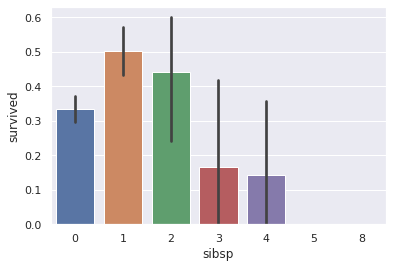

In [35]:
sns.barplot(x='sibsp', y='survived', data=train_df)

In [36]:
#Анализ зависимости числа детей родителей и выживаемости
train_df.parch.value_counts()

0    651
1    113
2     72
4      5
3      3
5      3
9      2
6      1
Name: parch, dtype: int64

In [37]:
train_df.groupby('parch').survived.value_counts()

parch  survived
0      0           438
       1           213
1      1            63
       0            50
2      0            38
       1            34
3      1             2
       0             1
4      0             4
       1             1
5      0             3
6      0             1
9      0             2
Name: survived, dtype: int64

In [38]:
train_df[['parch', 'survived']].groupby('parch', as_index=False).mean()

,parch,survived
0,0,0.327189
1,1,0.557522
2,2,0.472222
3,3,0.666667
4,4,0.200000
5,5,0.000000
6,6,0.000000
7,9,0.000000


<AxesSubplot:xlabel='parch', ylabel='survived'>

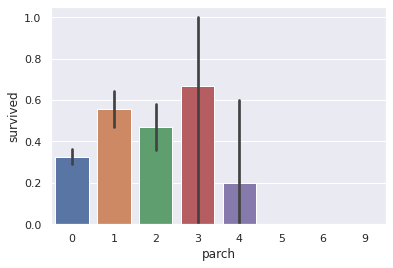

In [39]:
sns.barplot(x='parch', y='survived', data=train_df)

In [40]:
#Анализ зависимости класса и пола пассажира на его выживаемость
pclass_s_tab = pd.crosstab(train_df['pclass'], train_df['sex'])
print(pclass_s_tab)

sex     female  male
pclass              
1           94   112
2           67    99
3          138   340


In [41]:
train_df.groupby(['pclass', 'sex'], as_index=False)['survived'].mean()

,pclass,sex,survived
0,1,female,0.946809
1,1,male,0.321429
2,2,female,0.895522
3,2,male,0.161616
4,3,female,0.442029
5,3,male,0.150000


In [42]:
#На основе полученных данных можем сделать вывод
# Женщины, имеющие билеты первого и второго класса имеют наивысшие шансы на спасение
# Среди мужчин пассажиры с билетами первого класса имеют наибольшие шансы на спасение

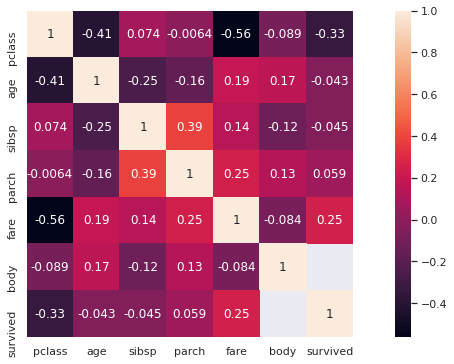

In [43]:
#Проверим зависимость между данными при помощи коррелляции признаков
plt.figure(figsize=(15,6))
sns.heatmap(train_df.drop('passenger_id', axis=1).corr(), square=True, annot=True, vmax=1)
plt.show()

In [44]:
#Объеденим датафреймы для простоты преобразования
train_test_df = [train_df, test_df]

In [45]:
#Конвертируем значение Sex в численное значение
for df in train_test_df:
    df['sex'] = df['sex'].map({'female':1, 'male':0}).astype(int)

In [46]:
#Заполним пустые поля признака embarked самым частым значением

In [47]:
train_df.embarked.unique()

array(['Q', 'S', 'C', nan], dtype=object)

In [48]:
train_df.embarked.value_counts()

S    589
C    176
Q     84
Name: embarked, dtype: int64

In [49]:
for df in train_test_df:
    df['embarked'] = df['embarked'].fillna('S')

In [50]:
#Теперь приведем значения Embarked к численному виду
for df in train_test_df:
    df['embarked'] = df['embarked'].map({'S':0, 'C':1, 'Q':2}).astype(int)

In [51]:
#Заполним пустые значения возраста произвольными значениями
# в диапазоне (age_mean - age_std) и до (age_mean + age_std)
#Создадим новый столбец age_band для разделения возрастов на категории
# Задача категоризации возрастов - упрощение множества возможных возрастов

for df in train_test_df:
    age_mean = df['age'].mean()
    age_std = df['age'].mean()
    age_nulls = df['age'].isnull().sum()
    age_null_list = np.random.randint((age_mean - age_std), (age_mean + age_std), size=age_nulls)
    
    df['age'][np.isnan(df['age'])] = age_null_list
    

train_df['age_band'] = pd.cut(train_df['age'], 5)
train_df[['age_band', 'survived']].groupby('age_band', as_index=False).mean()

<ipython-input-51-097cc3ae2c6a>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['age'][np.isnan(df['age'])] = age_null_list


,age_band,survived
0,"(-0.08, 16.0]",0.456376
1,"(16.0, 32.0]",0.341026
2,"(32.0, 48.0]",0.345178
3,"(48.0, 64.0]",0.396226
4,"(64.0, 80.0]",0.250000


In [52]:
for df in train_test_df:
    df.loc[df['age'] <= 16.133, 'age'] = 0
    df.loc[(df['age'] > 16.133) & (df['age'] <= 32.100), 'age'] = 1
    df.loc[(df['age'] > 32.100) & (df['age'] <= 48.067), 'age'] = 2
    df.loc[(df['age'] > 48.067) & (df['age'] <= 64.033), 'age'] = 3
    df.loc[(df['age'] > 64.033) & (df['age'] <= 80.000), 'age'] = 4
    df['age'] = df['age'].astype(int)


In [53]:
#Заполним пустые значения стоимости билетов усредненными значениями
#Создадим новый столбец fare_band для разделения возрастов на категории
# Задача категоризации стоимости- упрощение множества возможных стоимостей

for df in train_test_df:
    df.fare = df.fare.fillna(train_df.fare.median())

train_df['fare_band'] = pd.qcut(train_df['fare'], 4)
train_df[['fare_band', 'survived']].groupby('fare_band', as_index=False).mean()

,fare_band,survived
0,"(-0.001, 7.896]",0.207048
1,"(7.896, 14.108]",0.285000
2,"(14.108, 30.924]",0.433333
3,"(30.924, 512.329]",0.553991


In [54]:
for df in train_test_df:
    df.loc[(df['fare'] > -0.001) & (df['fare'] <= 7.896), 'fare'] = 0
    df.loc[(df['fare'] > 7.896) & (df['fare'] <= 14.108), 'fare'] = 1
    df.loc[(df['fare'] > 14.108) & (df['fare'] <= 30.924), 'fare'] = 2
    df.loc[(df['fare'] > 30.924) & (df['fare'] <= 512.329), 'fare'] = 3
    df['fare'] = df['fare'].astype(int)

In [55]:
#Введем дополнительный  столбцы fam_size и alone для оценки влияния родственников на спасение пассажира
for df in train_test_df:
    df['fam_size'] = 1 + df['sibsp'] + df['parch']
    df['alone'] = 0
    df.loc[df['fam_size'] == 1, 'alone'] = 1

In [56]:
train_df[['fam_size', 'survived']].groupby(['fam_size'], as_index=False).mean()

,fam_size,survived
0,1,0.294004
1,2,0.537415
2,3,0.549020
3,4,0.586207
4,5,0.333333
5,6,0.133333
6,7,0.222222
7,8,0.000000
8,11,0.000000


In [57]:
train_df[['alone', 'survived']].groupby('alone', as_index=False).mean()

,alone,survived
0,0,0.483483
1,1,0.294004


In [58]:
#Из полученных данных можно сделать вывод, что
# одинокие пассажиры имеют меньшие шансы на спасение
# наличие у пассажира от 1-го до 3-х родственников значительно увеличивает шансы на спасение
# наличие у пассажира от 4-х и более родственников снижает его шансы на спасение

In [59]:
train_df['home.dest'].unique()

array([nan, 'Croatia', 'Cornwall / Akron, OH', 'Barre, Co Washington, VT',
       'Finland / Washington, DC', 'Elkins Park, PA', 'Philadelphia, PA',
       'Mt Airy, Philadelphia, PA', 'East Providence, RI',
       'Weston-Super-Mare / Moose Jaw, SK',
       'St Leonards-on-Sea, England Ohio', 'Somerset / Bernardsville, NJ',
       'London Skanteales, NY', 'Hornsey, England', 'Plymouth, England',
       'New York, NY', 'Bristol, England Cleveland, OH',
       'Cornwall / Camden, NJ', 'Haverford, PA / Cooperstown, NY',
       'Tuxedo Park, NY', 'Bridgerule, Devon', 'West Hoboken, NJ',
       'Plymouth, Devon / Detroit, MI', 'Greenwich, CT', 'Ireland',
       'Indianapolis, IN', 'Bryn Mawr, PA',
       'Germantown, Philadelphia, PA', 'London Brooklyn, NY',
       'Co Sligo, Ireland Hartford, CT', 'Devon, England Wichita, KS',
       'Huntington, WV', 'Sittingbourne, England / San Diego, CA',
       'Harrow-on-the-Hill, Middlesex', 'London',
       'Strood, Kent, England Detroit, MI', 'Bu

In [60]:
#Отбросим признаки, не используемые в нашей модели
train_df = train_df.drop(['passenger_id', 'name', 'sibsp', 'parch', 'ticket', 'cabin', 'boat', 'body', 'home.dest', 'age_band', 'fare_band', 'fam_size'], axis=1)
test_df = test_df.drop(['name', 'sibsp', 'parch', 'ticket', 'cabin', 'boat', 'body', 'home.dest', 'fam_size'], axis=1)

In [61]:
test_df.head()

,passenger_id,pclass,sex,age,fare,embarked,alone
0,295,1,0,1,3,1,0
1,1150,3,0,1,2,0,1
2,89,1,0,1,3,0,0
3,1063,3,0,2,0,0,1
4,1020,3,0,1,0,0,1


In [62]:
train_df.head()

,pclass,sex,age,fare,embarked,survived,alone
0,3,1,0,0,2,1,1
1,3,0,2,1,0,0,1
2,3,1,1,2,0,0,0
3,2,1,3,2,0,1,0
4,2,0,2,1,0,0,1


<AxesSubplot:>

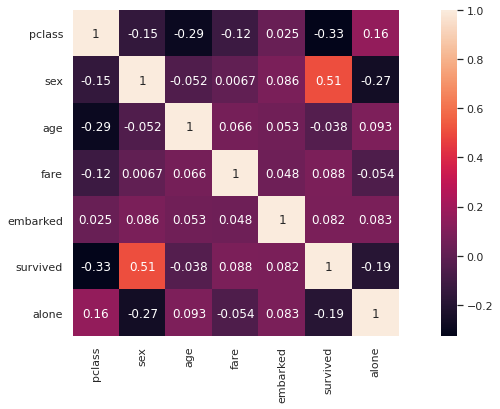

In [63]:
plt.figure(figsize=(15,6))
sns.heatmap(train_df.corr(), square=True, annot=True)

In [64]:
#
#Данная задача относится к классу задач бинарной классификации, 
# тк нам необходимо выбрать один из двух исходов

#Процесс составления модели:
# Тренировка выбранного классификатора на основе тренировочных данных
# Составление модели натренированным классификатором при помощи тестового набора данных

#Для составления модели будут использоваться данные методы классификации:
# Логистическая регрессия(Logistic Regression)
# Решающие деревья (decision tree)
# Случайный лес (random forest)

#Для каждого из данных алгоритмов будет опрелена точность его работы на тренировочных данных
# Точность работы необходима для выбора наилучшего из методов в рамках данной задачи

In [65]:
#столбцы тренировачного набора
x_train = train_df.drop('survived', axis=1)
#результаты тренировачного набора
y_train = train_df['survived']
#столбы тестового набора
x_test = test_df.drop('passenger_id', axis=1).copy()

In [66]:
x_train.shape, x_test.shape

((850, 6), (459, 6))

In [67]:
#Импортируем модули классификаторов
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [68]:
#Логистическая регрессия
clf = LogisticRegression()
clf.fit(x_train, y_train)
log_reg_acc = round(clf.score(x_train, y_train) * 100, 3)
print(log_reg_acc)

y_test_log_reg = clf.predict(x_test)

77.882


In [69]:
#Решающие деревья
clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)
dec_tree_class_acc = round(clf.score(x_train, y_train) * 100, 3)
print(dec_tree_class_acc)

y_test_dec_tree = clf.predict(x_test)

86.235


In [70]:
#Случайный лес
clf = RandomForestClassifier()
clf.fit(x_train, y_train)
rand_for_acc = round(clf.score(x_train, y_train) * 100, 3)
print(rand_for_acc)

y_test_rand_for = clf.predict(x_test)

86.235


In [71]:
#Выбран способ моделирования при помощи классификации random forest
sub = pd.DataFrame({'passenger_id': test_df['passenger_id'], 'survived': y_test_rand_for})
sub.shape
#sub.to_csv('submission.csv', index=False)

(459, 2)